# Illustration of Method to calculate Lyapunov exponent
### see Rosenstein 1993
following Neurokit2 Implementation: https://neuropsychology.github.io/NeuroKit/_modules/neurokit2/complexity/complexity_lyapunov.html#complexity_lyapunov

In [3]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

We first define the logistic equation and use the parameters as defined in the paper

In [5]:
def equation (r, seed, iterations):
    """
    Outputs the time series plot of the logistic equation given some parameters

    Arguments:
    r            -- growth rate of population
    seed         -- the seed of this function x0
    iterations   -- number of iterations to calculate

    Output:
    out      -- values of X over time given initial condition
    
    """
    
    # initialize output and insert seed
    out = []
    out.append(seed)
    
    x = seed
    # iterate over iterations and calculate new y
    for i in range(iterations):
        # x as Population next year
        x = r*x*(1-x)
        #x = (r*x)+3
        out.append(x)
    return(out)     

In [77]:
# Define parameters and initial condition

#r = 3.6 # should lead stable dynamics
r = 3.79 # should lead chaos

seed =0.0001
iterations = 21000
transient = 20000

In [78]:
# calculate time-series of the logistic map and define output after transient
out = equation(r, seed, iterations)
Obs = out[transient+1:]  # This is our observerd Time Series
Obs = np.array(Obs)

Text(0.5, 1.0, 'Observed time series from logistic map')

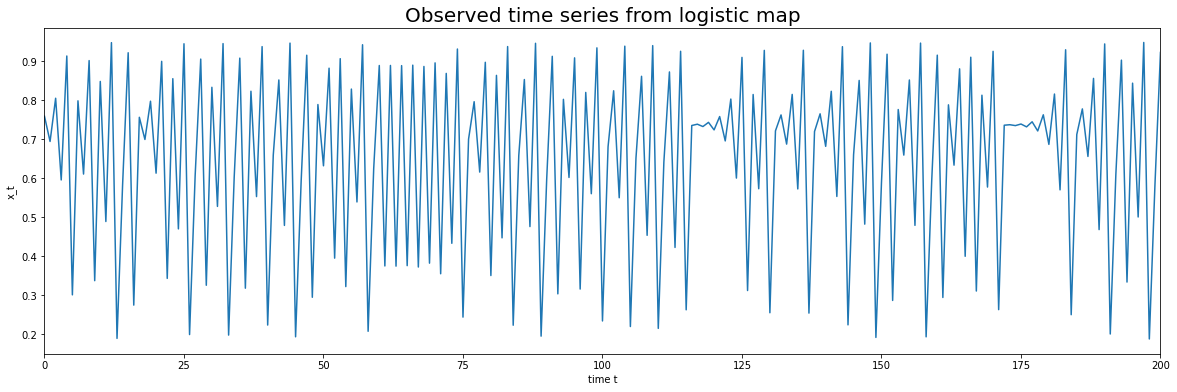

In [79]:
plt.figure(figsize = (20, 6))
plt.plot(Obs)
plt.xlabel("time t")
plt.ylabel("x_t")
plt.xlim(0,200)
plt.title('Observed time series from logistic map', fontsize =20)

# Create delay-embedding

In [80]:
delay=1
dimension=2
separation=1
len_trajectory=20

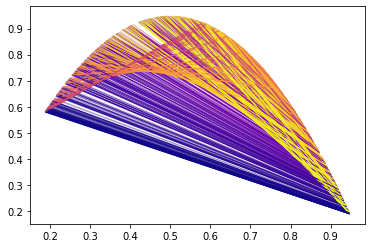

In [81]:
# Create Embedding
embedded = complexity_embedding(Obs, delay=delay, dimension=dimension, show = True)
m = len(embedded)

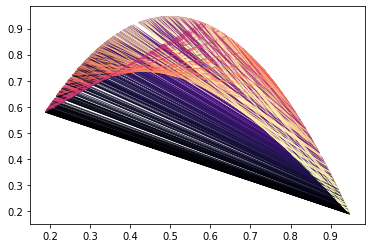

In [82]:
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

x    = embedded[:,0]
y    = embedded[:,1]
alphas = np.arange(len(x))
alphas = y

points = np.vstack((x, y)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, cmap='magma', lw=1, alpha = 0.8)
line = ax.add_collection(lc)
ax.autoscale()
plt.show()

In [83]:
import sklearn
# Construct matrix with pairwise distances between vectors in orbit
dists = sklearn.metrics.pairwise.euclidean_distances(embedded)

for i in range(m):
    # Exclude indices within separation
    dists[i, max(0, i - separation) : i + separation + 1] = np.inf


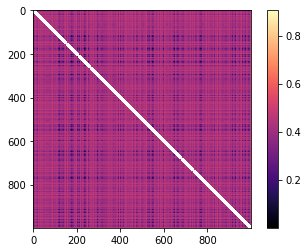

In [84]:
plt.imshow(dists, cmap='magma')
plt.colorbar()

In [85]:
 # Find indices of nearest neighbours
ntraj = m - len_trajectory + 1
min_dist_indices = np.argmin(dists[:ntraj, :ntraj], axis=1)  # exclude last few indices
min_dist_indices = min_dist_indices.astype(int)
len(min_dist_indices)

980

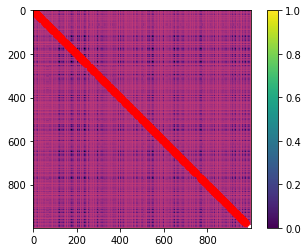

In [86]:
plt.imshow(dists, cmap='magma')
plt.scatter(min_dist_indices,min_dist_indices, color = 'red')
plt.colorbar()

In [87]:
# Follow trajectories of neighbour pairs for len_trajectory data points
trajectories = np.zeros(len_trajectory)
for k in range(len_trajectory):
    divergence = dists[(np.arange(ntraj) + k, min_dist_indices + k)]
    dist_nonzero = np.where(divergence != 0)[0]
    if len(dist_nonzero) == 0:
        trajectories[k] = -np.inf
    else:
        # Get average distances of neighbour pairs along the trajectory
        trajectories[k] = np.mean(np.log(divergence[dist_nonzero]))

In [95]:
dists[(np.arange(ntraj) + k, min_dist_indices + k)].shape

(980,)

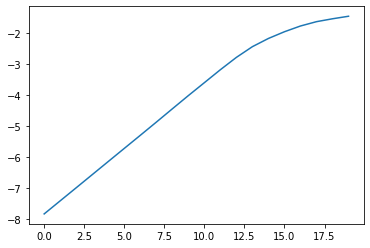

In [88]:
plt.plot(trajectories)

In [89]:
divergence_rate = trajectories[np.isfinite(trajectories)]
divergence_rate

array([-7.84192652, -7.41859617, -6.99564129, -6.57123288, -6.14644364,
       -5.72247304, -5.2990797 , -4.87273206, -4.4420555 , -4.01404892,
       -3.59553578, -3.1759714 , -2.77684873, -2.42991202, -2.16449008,
       -1.94704329, -1.76145048, -1.6215643 , -1.52801947, -1.4459726 ])

In [90]:
# LLE obtained by least-squares fit to average line
slope, intercept = np.polyfit(np.arange(1, len(divergence_rate) + 1), divergence_rate, 1)
slope

0.3592457598198252

# Final Code

0.35899568693334993

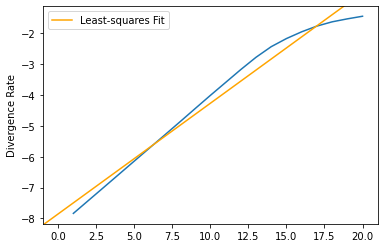

In [91]:
lle, info = nk.complexity_lyapunov(Obs, method="rosenstein1993", show=True)
lle